In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



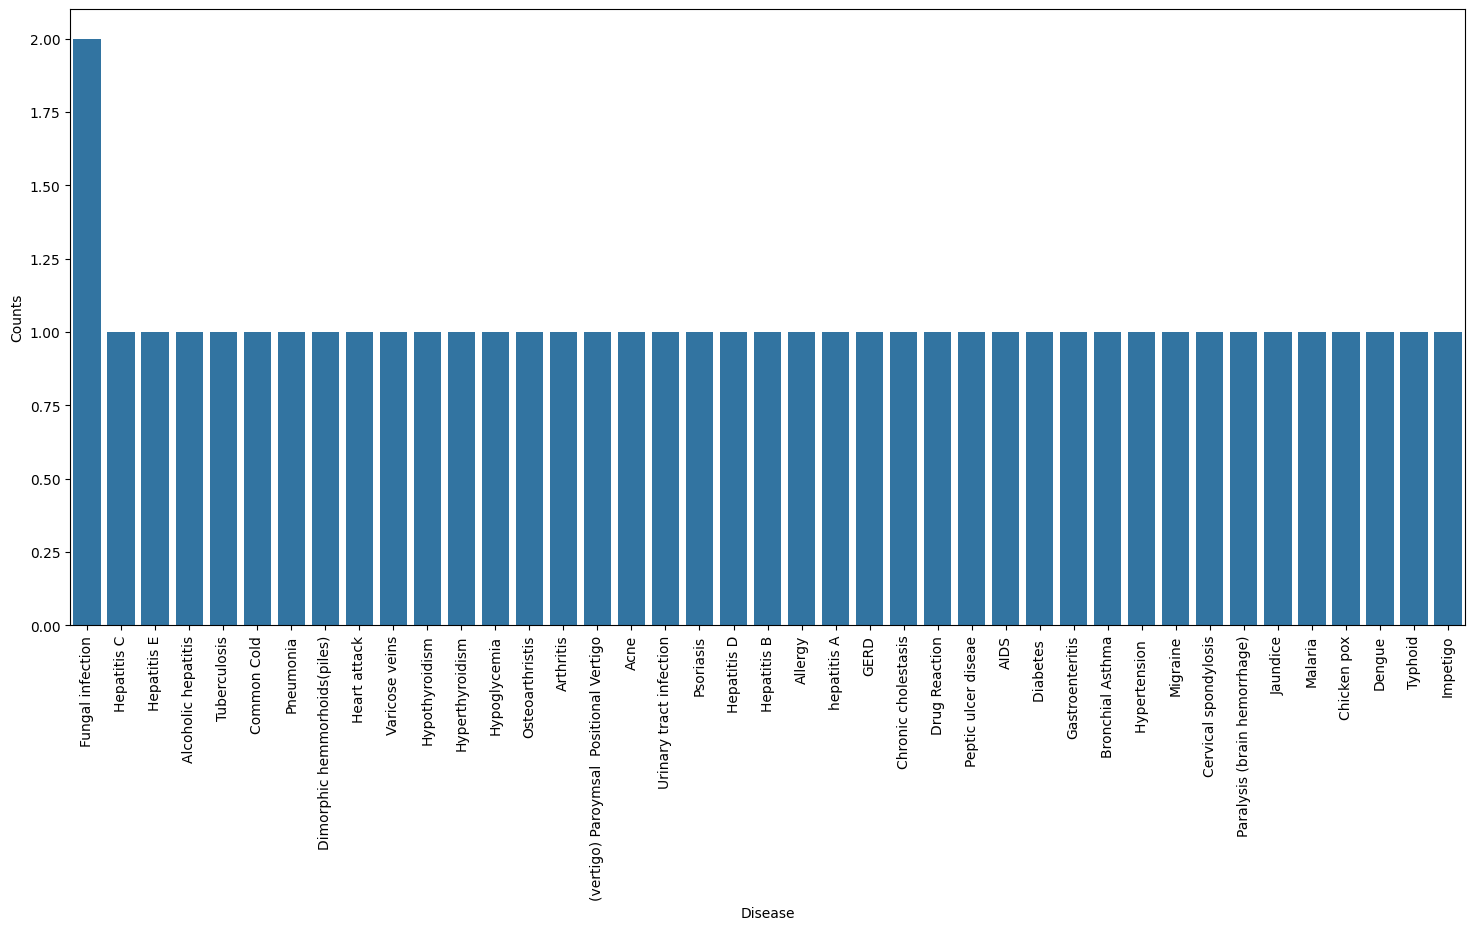

In [2]:
# Reading the train.csv by removing the 
# last column since it's an empty column
DATA_PATH = "Dataset---Disease-Prediction-Using--Machine-Learning.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [3]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (33, 132), (33,)
Test: (9, 132), (9,)


In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Calculate the minimum class size
min_class_size = min(np.bincount(y))

# Ensure n_splits is at least 2 and at most the size of the smallest class
n_splits = max(2, min(10, min_class_size))

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    
    # Create a pipeline with SMOTE and the model
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    # Use StratifiedKFold to ensure each fold has a representative distribution of classes
    skf = StratifiedKFold(n_splits=n_splits)
    
    scores = cross_val_score(pipeline, X, y, cv=skf, n_jobs=-1, scoring=cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

c:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\CodeBert\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808


c:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\CodeBert\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Gaussian NB
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808


c:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\CodeBert\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808


Accuracy on train data by SVM Classifier: 90.9090909090909
Accuracy on test data by SVM Classifier: 0.0


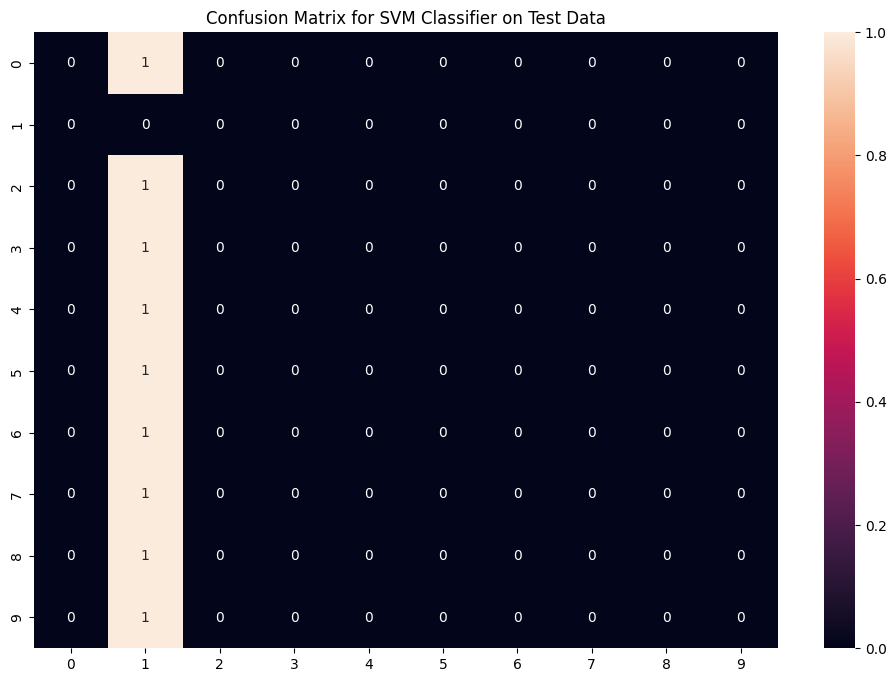

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 0.0


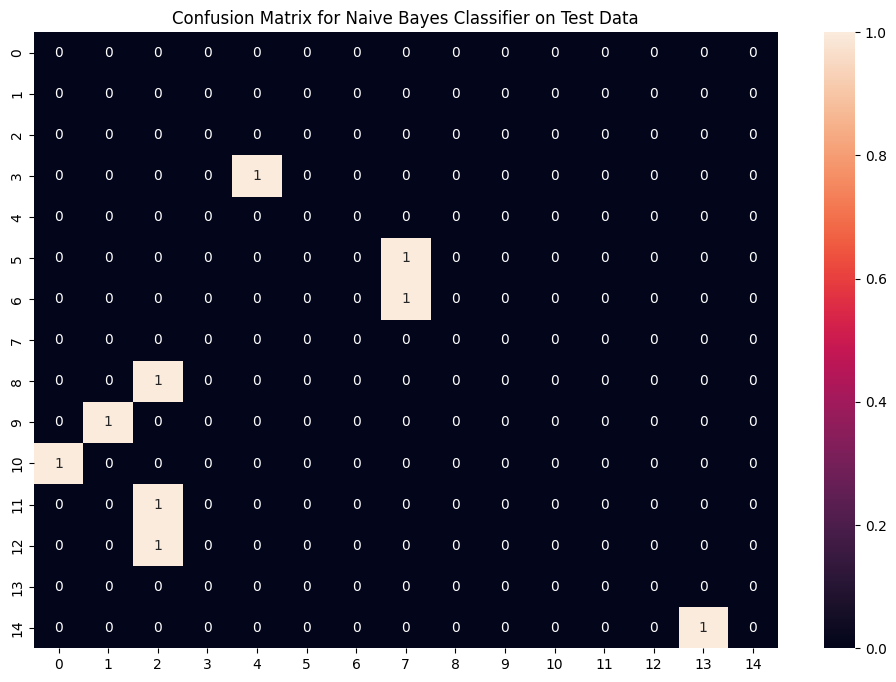

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 0.0


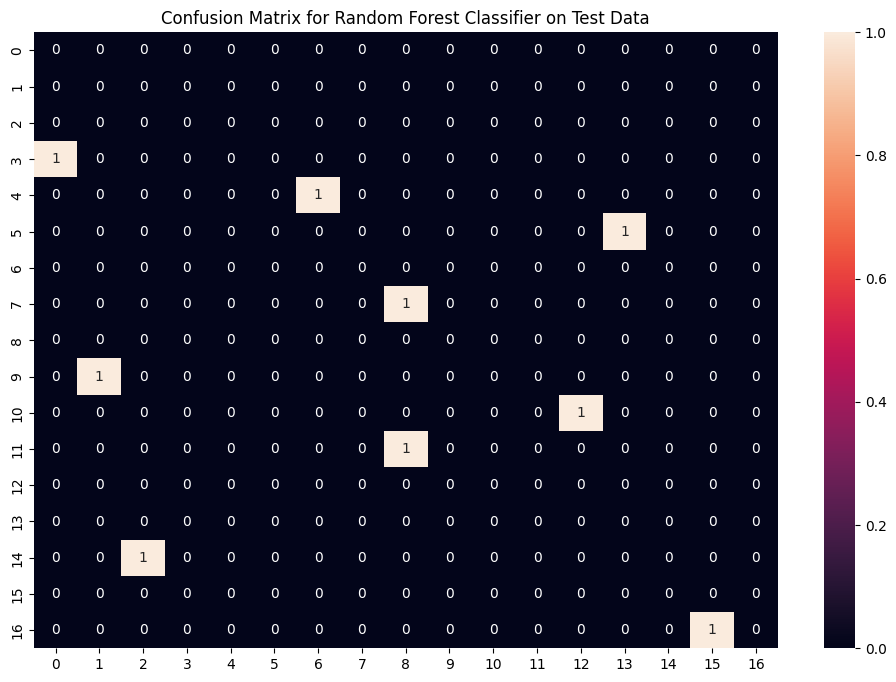

In [6]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


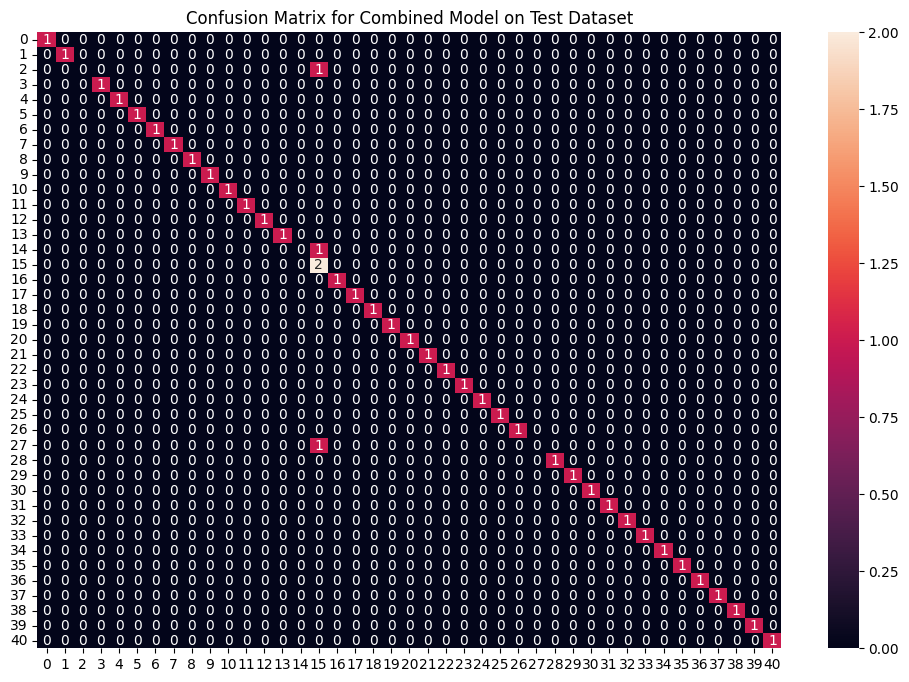

In [7]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

# Train the models on the whole data
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

test_data = pd.read_csv(r"C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\Dataset---Disease-Prediction-Using--Machine-Learning.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = test_data.iloc[:, -1]

svm_preds = final_svm_model.predict(test_X)
# Ensure test_Y is encoded using the same encoder
test_Y_encoded = encoder.transform(test_Y)

cf_matrix = confusion_matrix(test_Y_encoded, svm_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

# This code is modified by Susobhan Akhuli


In [8]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Anxiety,Cold Hands And Feets,Mood Swings"))

# This code is modified by Susobhan Akhuli


{'rf_model_prediction': 'Hypothyroidism', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


c:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\CodeBert\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\CodeBert\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\CodeBert\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [9]:
# Input: string containing symptoms separated by commas
# Output: Generated final prediction by Random Forest model
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        symptom = symptom.strip()  # Remove any leading/trailing whitespace
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in symptom index.")

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # generating prediction using Random Forest model
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]

    return rf_prediction

# Evaluate model performance on a validation set
def evaluate_models(X_val, y_val):
    rf_score = final_rf_model.score(X_val, y_val)
    nb_score = final_nb_model.score(X_val, y_val)
    svm_score = final_svm_model.score(X_val, y_val)
    
    print(f"Random Forest Model Accuracy: {rf_score}")
    print(f"Naive Bayes Model Accuracy: {nb_score}")
    print(f"SVM Model Accuracy: {svm_score}")

# Testing the function
print(predictDisease("Anxiety,Cold Hands And Feets,Mood Swings"))

# Assuming X_val and y_val are your validation data
# evaluate_models(X_val, y_val)

Hypothyroidism


c:\Users\Sumit Kumar.DESKTOP-FNL8J4G\Desktop\CodeBERT\CodeBert\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
# List all symptoms available in the dataset
symptoms = data_dict["symptom_index"].keys()
print("Available symptoms in the dataset:")
for symptom in symptoms:
    print(symptom)

Available symptoms in the dataset:
Itching
Skin Rash
Nodal Skin Eruptions
Continuous Sneezing
Shivering
Chills
Joint Pain
Stomach Pain
Acidity
Ulcers On Tongue
Muscle Wasting
Vomiting
Burning Micturition
Spotting  urination
Fatigue
Weight Gain
Anxiety
Cold Hands And Feets
Mood Swings
Weight Loss
Restlessness
Lethargy
Patches In Throat
Irregular Sugar Level
Cough
High Fever
Sunken Eyes
Breathlessness
Sweating
Dehydration
Indigestion
Headache
Yellowish Skin
Dark Urine
Nausea
Loss Of Appetite
Pain Behind The Eyes
Back Pain
Constipation
Abdominal Pain
Diarrhoea
Mild Fever
Yellow Urine
Yellowing Of Eyes
Acute Liver Failure
Fluid Overload
Swelling Of Stomach
Swelled Lymph Nodes
Malaise
Blurred And Distorted Vision
Phlegm
Throat Irritation
Redness Of Eyes
Sinus Pressure
Runny Nose
Congestion
Chest Pain
Weakness In Limbs
Fast Heart Rate
Pain During Bowel Movements
Pain In Anal Region
Bloody Stool
Irritation In Anus
Neck Pain
Dizziness
Cramps
Bruising
Obesity
Swollen Legs
Swollen Blood Vessels
